In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
from tqdm.notebook import tqdm

In [37]:
june = pd.read_csv("2022.06_행정동 단위 업종별 지역화폐 거래 데이터.csv",encoding = 'cp949',low_memory =False)
july = pd.read_csv("2022.07_행정동 단위 업종별 지역화폐 거래 데이터.csv", encoding = 'cp949', low_memory =False)
august = pd.read_csv("2022.08_행정동 단위 업종별 지역화폐 거래 데이터.csv", encoding = 'cp949', low_memory = False)
df = pd.concat([june, july,august], ignore_index=True)

In [38]:
df = df.rename(columns = {'strd_date':'기준일자', 'strd_tizn_val':'기준시간대값', 'ctpr_nm':'시도명', 'ccg_nm':'시군구명', 'adn_dgnm':'행정동명',
       'adng_no':'행정동번호', 'cardc_nm':'카드사명', 'tpbuz_cd':'업종코드', 'tpbuz_nm':'업종명', 'bth_yr':'출생년도', 'sex_cd':'성별코드',
       'trns_cnt':'거래건수', 'ttl_trns_amt':'총거래금액'})

In [39]:
# 불필요한 변수제거
df=df.drop(['시도명'], axis=1)
df=df.drop(['행정동번호'], axis=1)
df=df.drop(['업종명'], axis=1)
df=df.drop(['행정동명'], axis=1)
df.drop(df[df['출생년도']==4607].index ,inplace=True, axis = 0)
df.drop(df[df['출생년도']==3688].index ,inplace=True, axis = 0)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27135019 entries, 0 to 27135159
Data columns (total 9 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   기준일자    int64 
 1   기준시간대값  int64 
 2   시군구명    object
 3   카드사명    object
 4   업종코드    int64 
 5   출생년도    int64 
 6   성별코드    object
 7   거래건수    int64 
 8   총거래금액   int64 
dtypes: int64(6), object(3)
memory usage: 2.0+ GB


In [41]:
# 기준일자 날짜형 변수로 변경
df=df.astype({'기준일자' : str})

In [42]:
df['기준일자']=pd.to_datetime(df['기준일자'])
from datetime import datetime
df['요일']=df['기준일자'].dt.day_name()
from pandas import DataFrame

In [43]:
# 나이 변수를 이용해 출생년도 생성
df['age']=2022-df['출생년도']+1
df['age_range'] = df['age']//10*10

In [44]:
df=df.drop(['age'], axis=1)
df=df.drop(['출생년도'], axis=1)

In [45]:
# 건당 거래금액 변수 생성 후 10원 미만 행 삭제
df['거래금액']=df['총거래금액']//df['거래건수']

In [46]:
df=df.drop(df[df['거래금액']<10].index, axis=0)

In [47]:
# 범주형 변수 범주형으로 변환
df['시군구명']=df['시군구명'].astype('category')
df['카드사명']=df['카드사명'].astype('category')
df['시군구명']=df['시군구명'].astype('category')
df['성별코드']=df['성별코드'].astype('category')
df['요일']=df['요일'].astype('category')
df['age_range']=df['age_range'].astype('category')

In [48]:
# 중분류 생성
code=pd.read_csv("업종코드_중분류.csv")
df=pd.merge(df,code, left_on='업종코드', right_on='업종코드', how='left')

In [49]:
#df=df.drop(['중분류_x'], axis=1)
#df=df.drop(['중분류_y'], axis=1)

In [50]:
df['업종코드']=df['업종코드'].astype('category')
df['중분류']=df['중분류'].astype('category')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27134908 entries, 0 to 27134907
Data columns (total 12 columns):
 #   Column     Dtype         
---  ------     -----         
 0   기준일자       datetime64[ns]
 1   기준시간대값     int64         
 2   시군구명       category      
 3   카드사명       category      
 4   업종코드       category      
 5   성별코드       category      
 6   거래건수       int64         
 7   총거래금액      int64         
 8   요일         category      
 9   age_range  category      
 10  거래금액       int64         
 11  중분류        category      
dtypes: category(7), datetime64[ns](1), int64(4)
memory usage: 1.4 GB


In [52]:
# 가맹점 데이터 로드 후 구별 가맹점 개수 확인
store=pd.read_csv("부산광역시_지역화폐(동백전) 가맹점 현황_20221222.csv", encoding='cp949')

In [53]:
store['주소']=store['도로명'].fillna(store['지번'])
store=store.drop(['도로명', '지번'], axis=1)

In [54]:
store['주소'].str.split().str[0].unique()

array(['부산', '부산광역시', '경남', '부산시', '서울', '대구', '충북', '경북', '울산', '경기'],
      dtype=object)

In [55]:
store1=store[store['주소'].str.startswith('부산')]

In [56]:
store1['시군구명']=store1['주소'].str.split().str[1]

C:\Users\horri\AppData\Local\Temp\ipykernel_26832\3548469376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store1['시군구명']=store1['주소'].str.split().str[1]


<AxesSubplot: xlabel='시군구명', ylabel='count'>

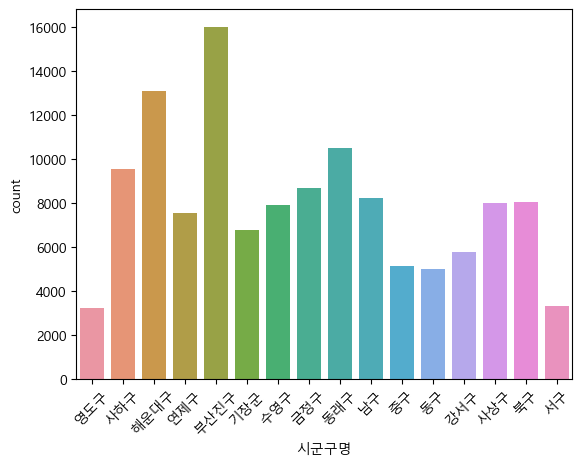

In [57]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.xticks(rotation=45)
sns.countplot(data=store1, x="시군구명")

In [58]:
store_count=store1.groupby('시군구명').count()
store_count=store_count.drop(store_count.columns[[1,2,3,4,5]], axis=1)
store_count.columns=['count']
store_count=store_count.sort_values('count', ascending=False)
store_count

,count
시군구명,
부산진구,16031
해운대구,13122
동래구,10508
사하구,9564
금정구,8710
남구,8243
북구,8068
사상구,7999
수영구,7912


In [59]:
df

,기준일자,기준시간대값,시군구명,카드사명,업종코드,성별코드,거래건수,총거래금액,요일,age_range,거래금액,중분류
0,2022-06-01,0,중구,코나,4010,M,1,7350,Wednesday,50,7350,편의점/마켓
1,2022-06-01,0,중구,부산,4010,F,1,3700,Wednesday,40,3700,편의점/마켓
2,2022-06-01,0,중구,부산,4010,M,1,7500,Wednesday,30,7500,편의점/마켓
3,2022-06-01,0,중구,부산,4010,M,1,2700,Wednesday,20,2700,편의점/마켓
4,2022-06-01,0,중구,코나,4010,M,1,13900,Wednesday,40,13900,편의점/마켓
...,...,...,...,...,...,...,...,...,...,...,...,...
27134903,2022-08-01,0,영도구,코나,4020,M,1,30000,Monday,60,30000,편의점/마켓
27134904,2022-08-01,0,영도구,코나,8013,M,1,59600,Monday,20,59600,기타
27134905,2022-08-01,0,영도구,코나,8399,F,1,7500,Monday,20,7500,생활
27134906,2022-08-01,0,영도구,하나,4010,F,2,7600,Monday,50,3800,편의점/마켓


### 구별 분석 - 중분류

In [60]:
# 구별 중분류 행 개수 상위 3개
grouped = df.groupby(['시군구명', '중분류']).size().reset_index(name='count')
top_3 = grouped.groupby('시군구명').apply(lambda x: x.nlargest(3, 'count')).reset_index(drop=True)
top_3
# 대부분 편의점, 생활, 양식 등 음식이다.

,시군구명,중분류,count
0,강서구,편의점/마켓,437872
1,강서구,양식,209551
2,강서구,생활,209029
3,금정구,편의점/마켓,653000
4,금정구,생활,377637
5,금정구,양식,334352
6,기장군,편의점/마켓,321517
7,기장군,양식,154930
8,기장군,생활,147798
9,남구,편의점/마켓,610559


In [61]:
# 구별 중분류 평균 건당 거래금액 상위 3개
grouped=df.groupby(['시군구명', '중분류']).mean('거래금액')['거래금액'].reset_index(name='거래금액')
top_3=grouped.groupby('시군구명').apply(lambda x: x.nlargest(3, '거래금액')).reset_index(drop=True)
top_3
# 연제구를 제외하고는 대부분 전자제품, 교육, 자동차/에너지, 일식이다. 연제구는 문화/취미가 있음 -> 연제구에 부산 서핑? 이런거 있는지 찾아봐도 좋을듯

,시군구명,중분류,거래금액
0,강서구,전자제품,243433.575758
1,강서구,교육,122102.015553
2,강서구,자동차/에너지,52273.230057
3,금정구,전자제품,140435.593220
4,금정구,교육,98477.247750
5,금정구,자동차/에너지,49924.882033
6,기장군,교육,135360.881641
7,기장군,자동차/에너지,43854.376053
8,기장군,일식,42503.522638
9,남구,교육,130044.526838


In [62]:
# 구별 중분류 중위수 건당 거래금액 상위 3개
grouped=df.groupby(['시군구명', '중분류']).median('거래금액')['거래금액'].reset_index(name='거래금액')
top_3=grouped.groupby('시군구명').apply(lambda x: x.nlargest(3, '거래금액')).reset_index(drop=True)
top_3
# 평균과 유사하나 중구에서 의류/패션잡화가 보임. 중구에 옷가게가 많은지 확인 필요. 중위수는 outlier 영향 덜 받아서 평균에서 상위값인데
# 중위수에서는 없는 것들은 높은 금액대 outlier가 있다고 볼 수 있음.

,시군구명,중분류,거래금액
0,강서구,전자제품,250000.0
1,강서구,교육,100000.0
2,강서구,자동차/에너지,50000.0
3,금정구,전자제품,76000.0
4,금정구,자동차/에너지,50000.0
5,금정구,일식,24900.0
6,기장군,교육,129000.0
7,기장군,자동차/에너지,44852.0
8,기장군,일식,34000.0
9,남구,교육,90000.0


In [63]:
# 구별 중분류 최대 건당 거래금액 상위 3개
grouped=df.groupby(['시군구명', '중분류']).max('거래금액')['거래금액'].reset_index(name='거래금액')
top_3=grouped.groupby('시군구명').apply(lambda x: x.nlargest(3, '거래금액')).reset_index(drop=True)
top_3
# 그래서 최대값을 확인해 봤는데 의외로 생활, 교육, 뷰티, 레저가 많이 나옴. -> 왜일까,,?

,시군구명,중분류,거래금액
0,강서구,생활,1100000.0
1,강서구,전자제품,1000000.0
2,강서구,교육,960000.0
3,금정구,생활,1430000.0
4,금정구,레저,1300000.0
5,금정구,자동차/에너지,1300000.0
6,기장군,교육,1100000.0
7,기장군,한식,1007000.0
8,기장군,기타,1000000.0
9,남구,생활,1470000.0


### 구별 분석 - 기준시간대값

In [66]:
# 구별 기준시간대값 행 개수 상위 3개
grouped = df.groupby(['시군구명', '기준시간대값']).size().reset_index(name='count')
top_3 = grouped.groupby('시군구명').apply(lambda x: x.nlargest(3, 'count')).reset_index(drop=True)
top_3
# 대부분 12시, 18시 근처임 아마 밥 시간대라고 예상

,시군구명,기준시간대값,count
0,강서구,12,129711
1,강서구,18,113918
2,강서구,17,111384
3,금정구,12,199917
4,금정구,18,192374
5,금정구,17,174279
6,기장군,12,92931
7,기장군,18,81716
8,기장군,13,80995
9,남구,12,178597


In [67]:
# 구별 기준시간대값 평균 건당 거래금액 상위 3개
grouped=df.groupby(['시군구명', '기준시간대값']).mean('거래금액')['거래금액'].reset_index(name='거래금액')
top_3=grouped.groupby('시군구명').apply(lambda x: x.nlargest(3, '거래금액')).reset_index(drop=True)
top_3
# 대부분 20시, 19시로 저녁시간대라 술 혹은 회식 정도로 예상 하지만 15시가 있는데 이유를 모르겠음, 학원? 여가?

,시군구명,기준시간대값,거래금액
0,강서구,20,26185.431816
1,강서구,19,26176.975256
2,강서구,15,25589.950973
3,금정구,19,22345.085592
4,금정구,20,22077.104567
5,금정구,16,20717.653643
6,기장군,19,27088.700846
7,기장군,18,26891.715368
8,기장군,20,25946.912248
9,남구,20,22959.251863


In [68]:
# 구별 기준시간대값 중위수 건당 거래금액 상위 3개
grouped=df.groupby(['시군구명', '기준시간대값']).median('거래금액')['거래금액'].reset_index(name='거래금액')
top_3=grouped.groupby('시군구명').apply(lambda x: x.nlargest(3, '거래금액')).reset_index(drop=True)
top_3
# 중위수로 보면 대부분 19시 근처 12시 정도인 걸로 봐서 식사로 예상됨, 아마 20시에는 간혹가다 비싸게 먹는 경우가 좀 있는듯.
# 또한 15시에는 아마 놀거리가 있을 수 있음.(비싼 체험 같은것?)

,시군구명,기준시간대값,거래금액
0,강서구,19,13410.0
1,강서구,20,12450.0
2,강서구,18,12240.0
3,금정구,19,10490.0
4,금정구,20,9500.0
5,금정구,18,9390.0
6,기장군,19,14420.0
7,기장군,18,13450.0
8,기장군,13,13000.0
9,남구,19,10600.0


In [102]:
# 구별 기준시간대값 최대 건당 거래금액 상위 3개
grouped=df.groupby(['시군구명', '기준시간대값']).max('거래금액')['거래금액'].reset_index(name='거래금액')
top_3=grouped.groupby('시군구명').apply(lambda x: x.nlargest(3, '거래금액')).reset_index(drop=True)
top_3
# 특별한 경향성은 보이지 않고 골고루 나온듯, 하지만 유사한 구들이 몇몇 보임 clustering 하면 뭔가 나올지도?

,시군구명,기준시간대값,거래금액
0,강서구,18,1100000
1,강서구,11,1000000
2,강서구,16,1000000
3,금정구,18,1430000
4,금정구,14,1300000
5,금정구,20,1300000
6,기장군,15,1100000
7,기장군,13,1007000
8,기장군,9,1000000
9,남구,15,1470000


### 구별 분석 - 요일

In [72]:
# 구별 요일 행 개수 상위 3개
grouped = df.groupby(['시군구명', '요일']).size().reset_index(name='count')
top_3 = grouped.groupby('시군구명').apply(lambda x: x.nlargest(3, 'count')).reset_index(drop=True)
top_3
# 금, 토, 수가 가장 많이 나오는데 수요일은 6,7,8 월에 요일개수가 가장 많아서 그런것 같음.

,시군구명,요일,count
0,강서구,Friday,210850
1,강서구,Wednesday,206584
2,강서구,Saturday,199202
3,금정구,Friday,335469
4,금정구,Wednesday,330052
5,금정구,Saturday,328765
6,기장군,Saturday,154399
7,기장군,Friday,146754
8,기장군,Wednesday,141052
9,남구,Friday,295027


In [73]:
# 구별 요일 평균 건당 거래금액 상위 3개
grouped=df.groupby(['시군구명', '요일']).mean('거래금액')['거래금액'].reset_index(name='거래금액')
top_3=grouped.groupby('시군구명').apply(lambda x: x.nlargest(3, '거래금액')).reset_index(drop=True)
top_3
# 대부분 목,금,토,일임 금토일은 주말이니까 아무래도 외식, 여행, 여가에서 돈을 많이 쓴 것으로 예상.
# 목요일은 회식? 아니면 금요일 휴가내고 돈을 많이 썼다고 볼 수도 있음 6,7,8이면 여름 휴가가 있는 계절
# 서구에서 화요일이 2위인데 이건 이유를 모르겠음 우연인듯?

,시군구명,요일,거래금액
0,강서구,Friday,23510.367346
1,강서구,Saturday,23388.850559
2,강서구,Monday,22479.443313
3,금정구,Saturday,20244.739574
4,금정구,Friday,19726.745974
5,금정구,Sunday,18507.906182
6,기장군,Saturday,24885.533002
7,기장군,Sunday,24134.276023
8,기장군,Friday,23742.134211
9,남구,Saturday,20967.045137


In [74]:
# 구별 요일 중위수 건당 거래금액 상위 3개
grouped=df.groupby(['시군구명', '요일']).median('거래금액')['거래금액'].reset_index(name='거래금액')
top_3=grouped.groupby('시군구명').apply(lambda x: x.nlargest(3, '거래금액')).reset_index(drop=True)
top_3
# 서구에서 화요일이 없어진 것으로 보아 화요일에 outlier가 몇개 있었는 듯

,시군구명,요일,거래금액
0,강서구,Sunday,11600.0
1,강서구,Saturday,11100.0
2,강서구,Friday,9800.0
3,금정구,Saturday,9000.0
4,금정구,Sunday,8700.0
5,금정구,Friday,8000.0
6,기장군,Sunday,12500.0
7,기장군,Saturday,12000.0
8,기장군,Friday,10000.0
9,남구,Saturday,9080.0


In [75]:
# 구별 요일 최대 건당 거래금액 상위 3개
grouped=df.groupby(['시군구명', '요일']).max('거래금액')['거래금액'].reset_index(name='거래금액')
top_3=grouped.groupby('시군구명').apply(lambda x: x.nlargest(3, '거래금액')).reset_index(drop=True)
top_3
# 보통 금 혹은 토가 포함돼 있고 나머지는 골고루 있다.
# 예상과 달리 서구에서 화요일이 포함되지 않은 것을 보아 한번 확인해볼 필요가 있어보임.

,시군구명,요일,거래금액
0,강서구,Friday,1100000
1,강서구,Monday,1000000
2,강서구,Wednesday,1000000
3,금정구,Friday,1430000
4,금정구,Thursday,1300000
5,금정구,Tuesday,1200000
6,기장군,Thursday,1100000
7,기장군,Sunday,1007000
8,기장군,Friday,1000000
9,남구,Tuesday,1470000


### 구별 분석 - 나이대

In [78]:
# 구별 나이대 행 개수 상위 3개
grouped = df.groupby(['시군구명', 'age_range']).size().reset_index(name='count')
top_3 = grouped.groupby('시군구명').apply(lambda x: x.nlargest(3, 'count')).reset_index(drop=True)
top_3
# 30,40,50대가 가장 많이 사용, 당연히 사회인들이라 지출이 많을 것으로 예상. 하지만 금정구에서만 20대가 1위인데 금정구가 20대들 핫플인지
# 알아볼 필요가 있어보임.

,시군구명,age_range,count
0,강서구,40,473223
1,강서구,30,381647
2,강서구,50,214758
3,금정구,20,446845
4,금정구,50,442071
5,금정구,40,440800
6,기장군,40,312514
7,기장군,30,204543
8,기장군,50,196883
9,남구,40,450062


In [79]:
# 구별 나이대 평균 건당 거래금액 상위 3개
grouped=df.groupby(['시군구명', 'age_range']).mean('거래금액')['거래금액'].reset_index(name='거래금액')
top_3=grouped.groupby('시군구명').apply(lambda x: x.nlargest(3, '거래금액')).reset_index(drop=True)
top_3
# 10대, 40대, 90대 등 의외로 좀 퍼져있음. 30,50대는 거의 없는 것으로 보아 많이 사용하지만 높은 금액을 사용하지는 않는듯 함.
# 40대에 지출이 많은데 아마 자식 혹은 수입이 많아서로 예상, 10대는 교육 90대는 여가 혹은 병원으로 예상.

,시군구명,age_range,거래금액
0,강서구,10,27465.078912
1,강서구,70,24983.695449
2,강서구,40,24734.278347
3,금정구,10,25864.527815
4,금정구,90,22734.148410
5,금정구,40,22480.540052
6,기장군,90,32426.942857
7,기장군,70,26586.273904
8,기장군,60,25966.698793
9,남구,90,23589.407216


In [80]:
# 구별 나이대 중위수 건당 거래금액 상위 3개
grouped=df.groupby(['시군구명', 'age_range']).median('거래금액')['거래금액'].reset_index(name='거래금액')
top_3=grouped.groupby('시군구명').apply(lambda x: x.nlargest(3, '거래금액')).reset_index(drop=True)
top_3
# 중위수로 봤을 때 60대 이상인 것으로 보아 지출이 병원쪽으로 나가서 높게 측정된 것으로 생각된다.

,시군구명,age_range,거래금액
0,강서구,70,12300.0
1,강서구,60,12000.0
2,강서구,80,12000.0
3,금정구,90,12460.0
4,금정구,60,10000.0
5,금정구,70,10000.0
6,기장군,60,13460.0
7,기장군,70,13000.0
8,기장군,80,12940.0
9,남구,80,10200.0


In [104]:
# 구별 나이대 최대 건당 거래금액 상위 3개
grouped=df.groupby(['시군구명', 'age_range']).max('거래금액')['거래금액'].reset_index(name='거래금액')
top_3=grouped.groupby('시군구명').apply(lambda x: x.nlargest(3, '거래금액')).reset_index(drop=True)
top_3
# 대부분 돈이 많은 시기인 30~60대 사이임. 간혹 20대가 있는데 젊은 나이에 돈을 많이 벌었거나 금수저인듯.

,시군구명,age_range,거래금액
0,강서구,40,1100000.0
1,강서구,30,1000000.0
2,강서구,50,960000.0
3,금정구,50,1430000.0
4,금정구,70,1300000.0
5,금정구,40,1200000.0
6,기장군,40,1100000.0
7,기장군,60,1007000.0
8,기장군,30,1000000.0
9,남구,40,1470000.0


### 구별 분석 - 성별

In [96]:
# 구별 성별 행 개수 상위 2개
grouped = df.groupby(['시군구명', '성별코드']).size().reset_index(name='count')
top_2 = grouped.groupby('시군구명').apply(lambda x: x.nlargest(2, 'count')).reset_index(drop=True)
top_2
# 대부분 여자가 높음

C:\Users\horri\AppData\Local\Temp\ipykernel_26832\673077783.py:3: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  top_2 = grouped.groupby('시군구명').apply(lambda x: x.nlargest(2, 'count')).reset_index(drop=True)


,시군구명,성별코드,count
0,강서구,F,685329
1,강서구,M,650782
2,금정구,F,1161455
3,금정구,M,989976
4,기장군,F,511194
5,기장군,M,452487
6,남구,F,1008887
7,남구,M,872620
8,동구,F,377939
9,동구,M,348452


In [97]:
# 구별 성별 평균 건당 거래금액 상위 2개
grouped=df.groupby(['시군구명', '성별코드']).mean('거래금액')['거래금액'].reset_index(name='거래금액')
top_2=grouped.groupby('시군구명').apply(lambda x: x.nlargest(2, '거래금액')).reset_index(drop=True)
top_2
# 북구와 사상구를 제외하고는 여자가 높음. 북구와 사상구에서 차이가 크지는 않지만 알아볼 필요는 있을 듯. 회사가 많다던가, 남자들이 주로
# 이용하는 가게가 많다던가 등등

,시군구명,성별코드,거래금액
0,강서구,F,22989.975183
1,강서구,M,22247.768463
2,금정구,F,19367.257261
3,금정구,M,18215.996945
4,기장군,F,23723.610306
5,기장군,M,23012.733935
6,남구,F,19899.644112
7,남구,M,18810.405176
8,동구,F,18132.774329
9,동구,M,17461.214176


In [98]:
# 구별 성별 중위수 건당 거래금액 상위 2개
grouped=df.groupby(['시군구명', '성별코드']).median('거래금액')['거래금액'].reset_index(name='거래금액')
top_2=grouped.groupby('시군구명').apply(lambda x: x.nlargest(2, '거래금액')).reset_index(drop=True)
top_2
# 동구에서 남자가 높은 것으로 보아 동구에서는 남자가 금액을 높게 사용하지만 여자 중에 outlier로 많이 사용하는 경우가 몇몇 있는듯.
# 북구와 사상구에서 여자가 높은 것으로 보아 outlier 남자가 몇몇 있는 듯. 혹은 남자들이 돈을 많이 쓸법한 장소가 있다고도 생각 가능.

,시군구명,성별코드,거래금액
0,강서구,F,10000.0
1,강서구,M,9000.0
2,금정구,F,8000.0
3,금정구,M,7380.0
4,기장군,F,10800.0
5,기장군,M,10000.0
6,남구,F,8450.0
7,남구,M,8000.0
8,동구,M,8000.0
9,동구,F,7900.0


In [99]:
# 구별 성별 최대 건당 거래금액 상위 2개
grouped=df.groupby(['시군구명', '성별코드']).max('거래금액')['거래금액'].reset_index(name='거래금액')
top_2=grouped.groupby('시군구명').apply(lambda x: x.nlargest(2, '거래금액')).reset_index(drop=True)
top_2
# 남구, 서구, 수영구, 영도구 제외 여자가 높음 하지만 이것은 최대값이라 큰 상관은 없을듯.

,시군구명,성별코드,거래금액
0,강서구,F,1100000
1,강서구,M,1000000
2,금정구,F,1430000
3,금정구,M,1300000
4,기장군,F,1100000
5,기장군,M,1000000
6,남구,M,1470000
7,남구,F,1400000
8,동구,F,1970000
9,동구,M,1410000


### 구별 분석 - 카드사

In [105]:
# 구별 카드사 행 개수 상위 3개
grouped = df.groupby(['시군구명', '카드사명']).size().reset_index(name='count')
top_3 = grouped.groupby('시군구명').apply(lambda x: x.nlargest(3, 'count')).reset_index(drop=True)
top_3
# 전부 코나, 하나, 부산 순으로 특이점은 없었음.

,시군구명,카드사명,count
0,강서구,코나,690809
1,강서구,하나,385688
2,강서구,부산,232309
3,금정구,코나,1157285
4,금정구,하나,521419
5,금정구,부산,423142
6,기장군,코나,514232
7,기장군,하나,266323
8,기장군,부산,157888
9,남구,코나,1018620


In [91]:
# 구별 카드사 평균 건당 거래금액 상위 3개
grouped=df.groupby(['시군구명', '카드사명']).mean('거래금액')['거래금액'].reset_index(name='거래금액')
top_3=grouped.groupby('시군구명').apply(lambda x: x.nlargest(3, '거래금액')).reset_index(drop=True)
top_3
# 대부분 QR, 코나, 하나 순이지만 종종 농협이 껴있음. 중구에는 농협대신 부산이 있음.
# QR로 어떤 것을 계산하는지 알아볼 필요가 있음. 농협이 있는 곳에 주거지구인지를 알아볼 필요 있음(장보는데 사용)
# 중구에는 왜 부산을 많이 사용했을지 생각.

,시군구명,카드사명,거래금액
0,강서구,QR,151907.021708
1,강서구,코나,23140.102856
2,강서구,농협,22177.615365
3,금정구,QR,65671.444444
4,금정구,코나,19103.123242
5,금정구,하나,19031.974147
6,기장군,QR,162071.387189
7,기장군,코나,23686.290384
8,기장군,하나,22735.440792
9,남구,QR,66682.484444


In [92]:
# 구별 카드사 중위수 건당 거래금액 상위 3개
grouped=df.groupby(['시군구명', '카드사명']).median('거래금액')['거래금액'].reset_index(name='거래금액')
top_3=grouped.groupby('시군구명').apply(lambda x: x.nlargest(3, '거래금액')).reset_index(drop=True)
top_3
# 평균과 비슷

,시군구명,카드사명,거래금액
0,강서구,QR,130000.0
1,강서구,코나,10000.0
2,강서구,농협,9800.0
3,금정구,QR,19015.0
4,금정구,코나,8000.0
5,금정구,하나,7750.0
6,기장군,QR,150000.0
7,기장군,코나,10650.0
8,기장군,하나,10200.0
9,남구,QR,30000.0


In [93]:
# 구별 카드사 최대 건당 거래금액 상위 3개
grouped=df.groupby(['시군구명', '카드사명']).max('거래금액')['거래금액'].reset_index(name='거래금액')
top_3=grouped.groupby('시군구명').apply(lambda x: x.nlargest(3, '거래금액')).reset_index(drop=True)
top_3
# 오히려 최대에는 QR이 많이 없는 것으로 보아 QR은 비싼것을 주로 사지만 아주 비싼 것을 사지는 않는듯.
# 당연히 농협은 없음.

,시군구명,카드사명,거래금액
0,강서구,하나,1100000
1,강서구,QR,1000000
2,강서구,부산,1000000
3,금정구,부산,1430000
4,금정구,코나,1300000
5,금정구,하나,1300000
6,기장군,코나,1100000
7,기장군,부산,1000000
8,기장군,하나,980000
9,남구,코나,1470000
